In [1]:
%config Completer.use_jedi = False

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import pandas as pd
from sklearn.model_selection import GridSearchCV, cross_val_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

In [186]:
pcadf = pd.read_csv('pcadf.csv')
pcadf.drop('Unnamed: 0', axis=1, inplace=True)
pcadf.head()

,diagadhd,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,0,-6.316805,-3.993805,2.608244,-1.797857,0.423307,-0.187192,-0.876326,2.580982,0.711263,1.395611,0.891940
1,0,-3.483505,3.740298,3.714569,-1.484037,-0.930910,-1.222975,-0.582311,-2.283823,0.448972,-1.363217,0.719320
2,0,-5.072733,-1.089991,-2.044430,-0.990274,4.428521,3.541817,0.358120,-1.682786,1.903088,2.190766,-3.164983
3,0,9.102421,-0.533293,0.310206,6.574120,1.079957,-0.325373,0.912234,1.602265,0.639051,-2.281226,0.750477
4,1,0.069205,-1.513307,0.906916,0.406835,-0.200540,2.935966,-0.702374,0.878684,1.902779,-0.771758,0.075177


In [187]:
pcadf = pcadf.iloc[:,0:10]
pcadf.head()

,diagadhd,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9
0,0,-6.316805,-3.993805,2.608244,-1.797857,0.423307,-0.187192,-0.876326,2.580982,0.711263
1,0,-3.483505,3.740298,3.714569,-1.484037,-0.930910,-1.222975,-0.582311,-2.283823,0.448972
2,0,-5.072733,-1.089991,-2.044430,-0.990274,4.428521,3.541817,0.358120,-1.682786,1.903088
3,0,9.102421,-0.533293,0.310206,6.574120,1.079957,-0.325373,0.912234,1.602265,0.639051
4,1,0.069205,-1.513307,0.906916,0.406835,-0.200540,2.935966,-0.702374,0.878684,1.902779


In [188]:
pcadf.shape

(117, 10)

In [189]:
X = pcadf.iloc[0:117,1:].values
y = pcadf.iloc[0:117,0].values
print(X.shape, y.shape)

(117, 9) (117,)


In [190]:
# train-test split evaluation of xgboost model
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# split data into X and y
#X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,2:], data['diagadhd'], test_size=0.3)
training_set, test_set = train_test_split(pcadf, test_size = 0.2, random_state = 7)
X_train = training_set.iloc[:,1:].values
y_train = training_set.iloc[:,0].values
X_test = test_set.iloc[:,1:].values
y_test = test_set.iloc[:,0].values

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

/home/tara/Programming/env/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:59:53] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 70.83%


In [191]:
log = LogisticRegression(C=0.18420699693267145, penalty='l2' )
rnd = RandomForestClassifier(n_estimators=80,bootstrap=False,max_depth=10,max_features='auto',min_samples_leaf=2, min_samples_split=5)
svm = SVC(C=1, kernel='linear',random_state=1 )

In [192]:
voting = VotingClassifier(
    estimators=[('logistic_regression', log),('random_forest', rnd), ('support_vector_machine', svm)],
    voting='hard')

In [193]:
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('logistic_regression',
                              LogisticRegression(C=0.18420699693267145)),
                             ('random_forest',
                              RandomForestClassifier(bootstrap=False,
                                                     max_depth=10,
                                                     min_samples_leaf=2,
                                                     min_samples_split=5,
                                                     n_estimators=80)),
                             ('support_vector_machine',
                              SVC(C=1, kernel='linear', random_state=1))])

In [194]:
scores = cross_val_score(voting, X_train, y_train, scoring='accuracy', cv=10)
print('10-CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

10-CV accuracy: 0.614 +/- 0.128


In [195]:
scores = cross_val_score(voting, X_test, y_test, scoring='accuracy', cv=10)
print('10-CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

10-CV accuracy: 0.783 +/- 0.317


In [196]:
# train set accuracy
for clf in (log, rnd, svm, voting):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.5833333333333334
RandomForestClassifier 0.625
SVC 0.625
VotingClassifier 0.625


In [197]:
#test set accuracy
for clf in (log, rnd, svm, voting):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.5833333333333334
RandomForestClassifier 0.7083333333333334
SVC 0.625
VotingClassifier 0.625


## Evaluation

In [199]:
# Confusion matrix
confusion = confusion_matrix(y_test, voting.predict(X_test))
print(confusion)

[[13  1]
 [ 8  2]]


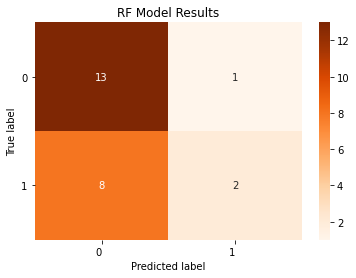

In [200]:
import seaborn as sns

heatmap = sns.heatmap(confusion, annot=True, cmap='Oranges')

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(),
                            rotation=0, ha='right')

heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(),
                            rotation=0, ha='right')

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('RF Model Results')
plt.show()

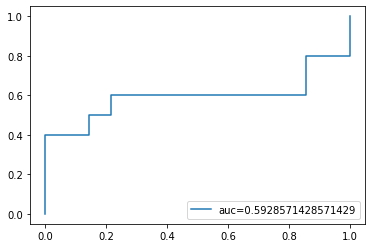

In [201]:
import scikitplot as skplt
import matplotlib.pyplot as plt

y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [87]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model

print('the sensitivity if this model is: ', TP / float(TP+FN))

# Let us calculate specificity

print('the specificity if this model is: ', TN / float(TN+FP))

the sensitivity if this model is:  0.2
the specificity if this model is:  0.9285714285714286


In [88]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

y_score1 = model.predict_proba(X_test)[:,1]
y_score2 = model.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)
print('roc_auc_score for SVM: ', roc_auc_score(y_test, y_score1))

roc_auc_score for SVM:  0.5928571428571429
